In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [2]:
#d_parser = lambda x:pd.datetime.strptime(x, '%d-%m-%Y')
dfstudent = pd.read_csv("student.txt")
dftask = pd.read_csv("task.txt")
dtresults = pd.read_csv("results.txt")

In [3]:
dfstudent

,id,S N
0,1,Borovets Roman
1,2,Hatala Olena
2,3,Hohco Sofiya
3,4,Padalka Marichka
4,5,Pek A


In [4]:
dftask

,id_task,task,a,b,c
0,1,Grafik,12,4,4
1,2,Derivative,7,10,3
2,3,LaguerreFunction,10,5,5
3,4,Classes,5,5,10
4,5,Pandas,5,4,11


In [5]:
dtresults['deadline']=pd.to_datetime(dtresults.deadline, format="%d-%m-%Y")
dtresults

,id,id_task,deadline,a Points,b Points,c Points,in time
0,2,1,2022-11-05,11,4,0,1
1,1,2,2022-11-10,7,3,10,1
2,5,5,2022-09-29,0,0,0,0
3,3,3,2022-10-10,7,5,4,0
4,4,4,2022-10-27,4,5,4,1


In [6]:
dfmrgd=pd.merge(dtresults,dftask)
dfmrgd=pd.merge(dfmrgd,dfstudent)
dfmrgd

,id,id_task,deadline,a Points,b Points,c Points,in time,task,a,b,c,S N
0,2,1,2022-11-05,11,4,0,1,Grafik,12,4,4,Hatala Olena
1,1,2,2022-11-10,7,3,10,1,Derivative,7,10,3,Borovets Roman
2,5,5,2022-09-29,0,0,0,0,Pandas,5,4,11,Pek A
3,3,3,2022-10-10,7,5,4,0,LaguerreFunction,10,5,5,Hohco Sofiya
4,4,4,2022-10-27,4,5,4,1,Classes,5,5,10,Padalka Marichka


# a)

In [7]:
dfmrgd['Result']=dfmrgd['a Points']+dfmrgd['b Points']+dfmrgd['c Points']
flt=[]

c=0
for i in dfmrgd['in time']:
    
    
    if i == 0:
        flt.append(c)
        
    else:
        print('')
    c+=1
for i in range(1,len(flt)):
    dp=dfmrgd['Result']
    dp[flt[i]]=dp[flt[i]]*(0.5)
    
    
dfmrgd['MaxResult']=dfmrgd['a']+dfmrgd['b']+dfmrgd['c']
dfmrgd[['S N','task','MaxResult','Result']]

C:\Users\user\AppData\Local\Temp\ipykernel_15676\2214692201.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp[flt[i]]=dp[flt[i]]*(0.5)


,S N,task,MaxResult,Result
0,Hatala Olena,Grafik,20,15
1,Borovets Roman,Derivative,20,20
2,Pek A,Pandas,20,0
3,Hohco Sofiya,LaguerreFunction,20,8
4,Padalka Marichka,Classes,20,13


# б)

In [8]:
dfmrgd[['S N','task','a Points','b Points','c Points','Result','MaxResult']]

,S N,task,a Points,b Points,c Points,Result,MaxResult
0,Hatala Olena,Grafik,11,4,0,15,20
1,Borovets Roman,Derivative,7,3,10,20,20
2,Pek A,Pandas,0,0,0,0,20
3,Hohco Sofiya,LaguerreFunction,7,5,4,8,20
4,Padalka Marichka,Classes,4,5,4,13,20


# в)

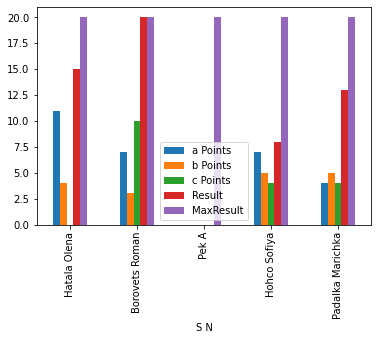

In [9]:
dfmrgd.set_index(['S N'],inplace = True)
d=dfmrgd[['a Points','b Points','c Points','Result','MaxResult']].plot(kind = 'bar')

# г)

,S N,id,id_task,deadline,a Points,b Points,c Points,in time,task,a,b,c,Result,MaxResult
Placement,,,,,,,,,,,,,,
1,Borovets Roman,1,2,2022-11-10,7,3,10,1,Derivative,7,10,3,20,20
2,Hatala Olena,2,1,2022-11-05,11,4,0,1,Grafik,12,4,4,15,20
3,Padalka Marichka,4,4,2022-10-27,4,5,4,1,Classes,5,5,10,13,20
4,Hohco Sofiya,3,3,2022-10-10,7,5,4,0,LaguerreFunction,10,5,5,8,20
5,Pek A,5,5,2022-09-29,0,0,0,0,Pandas,5,4,11,0,20


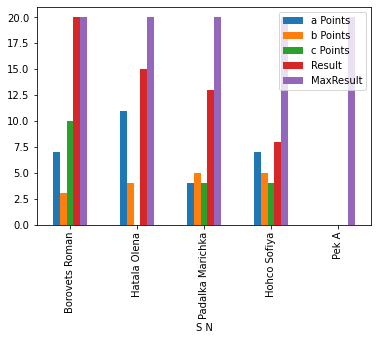

In [10]:
dfmrgd.sort_values(by = ['Result'], ascending = False, inplace = True)
d=dfmrgd[['a Points','b Points','c Points','Result','MaxResult']].plot(kind = 'bar')
d
dfmrgd.reset_index(inplace = True)
dfmrgd['Placement'] = dfmrgd.index + 1
dfmrgd.set_index(['Placement'], inplace = True)
dfmrgd


In [12]:

filt=[]

c=0
for i in dfmrgd['Result']:
    
    c+=1
    k='r'
    #c+=1
    if i == 0:
        filt.append(c)
        filt.append(k)
        c+=1
    else:
        print('')
c=0  
for i in dfmrgd['a Points']:
    
    c+=1
    k='a'
    #c+=1
    if i == 0:
        filt.append(c)
        filt.append(k)
        c+=1
    else:
        print('')
c=0
for i in dfmrgd['b Points']:
    
    c+=1
    k='b'
    #c+=1
    if i == 0:
        filt.append(c)
        filt.append(k)
        c+=1
    else:
        print('')
c=1
for i in dfmrgd['c Points']:
    
    
    k='c'
    
    if i == 0:
        
        filt.append(c)
        filt.append(k)
        c+=1
    else:
        c+=1


f=""
for i in range(1,len(filt), 2):
    if filt[i] == 'r':
        dp=dfmrgd.iloc[filt[i-1]-1]
        dp=dp.transpose()
        display(dp)
        f="{dp['S N']} heve 0 for all task"'\n''\n''\n''\n'
        print(f)
    elif filt[i] == 'a':
        dp=dfmrgd.iloc[filt[i-1]-1]
        dp=dp.transpose()
        print(dp)
        f="{dp['S N']} heve 0 for task a"'\n''\n''\n''\n'
        print(f)
        
    elif filt[i] == 'b':
        dp=dfmrgd.iloc[filt[i-1]-1]
        dp=dp.transpose()
        print(dp)
        f="{do['S N']} heve 0 for task b  "'\n''\n''\n''\n'
        print(f)
        
    elif filt[i] == 'c':
        dp=dfmrgd.iloc[filt[i-1]-1]
        dp=dp.transpose()
        print(dp)
        f="{dp['S N']} heve 0 for task c "'\n''\n''\n''\n'
        print(f)
        
    
    

S N                        Pek A
id                             5
id_task                        5
deadline     2022-09-29 00:00:00
a Points                       0
b Points                       0
c Points                       0
in time                        0
task                      Pandas
a                              5
b                              4
c                             11
Result                         0
MaxResult                     20
Name: 5, dtype: object

{dp['S N']} heve 0 for all task




S N                        Pek A
id                             5
id_task                        5
deadline     2022-09-29 00:00:00
a Points                       0
b Points                       0
c Points                       0
in time                        0
task                      Pandas
a                              5
b                              4
c                             11
Result                         0
MaxResult                     20
Name: 5, dtype: object
{dp['S N']} heve 0 for task a




S N                        Pek A
id                             5
id_task                        5
deadline     2022-09-29 00:00:00
a Points                       0
b Points                       0
c Points                       0
in time                        0
task                      Pandas
a                              5
b                              4
c                             11
Result                         0
MaxResult       

# е)


In [118]:
dfmrgd['Summary']=dfmrgd['Result']*100/dfmrgd['MaxResult']
dfmrgd

,S N,id,id_task,deadline,a Points,b Points,c Points,in time,task,a,b,c,Result,MaxResult,Summary
Placement,,,,,,,,,,,,,,,
1,Borovets Roman,1,2,2022-11-10,7,3,10,1,Derivative,7,10,3,20,20,100.0
2,Hatala Olena,2,1,2022-11-05,11,4,0,1,Grafik,12,4,4,15,20,75.0
3,Padalka Marichka,4,4,2022-10-27,4,5,4,1,Classes,5,5,10,13,20,65.0
4,Hohco Sofiya,3,3,2022-10-10,7,5,4,0,LaguerreFunction,10,5,5,8,20,40.0
5,Pek A,5,5,2022-09-29,0,0,0,0,Pandas,5,4,11,0,20,0.0
